# Final Assignment RO47002 - Machine Learning for Robotics 2023/2024

Before you start, fill in the cell below your lab group's number and the names of both lab partners.
It is also suggested that you carefully read through all provided content before you start adding things.

*Note*: as always, basic plagiarism and ethical guidelines apply:
* By submitting this notebook, **you both claim that the solution is yours and yours only.**
* You are not allowed to share your work with others.
* Even after the deadline has passed, do *not* share or upload your solution anywhere (e.g. do not put it on github).

In [23]:
GROUP_NUMBER = "74"
STUDENT_NAME1 = "Kevin Tran"
STUDENT_NUMBER1 = "4904672"
STUDENT_NAME2 = "Dielof van Loon"
STUDENT_NUMBER2 = "5346894"

In [24]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert(GROUP_NUMBER != "")
assert(STUDENT_NAME1 != "")
assert(STUDENT_NUMBER1 != "")
assert(STUDENT_NAME2 != "")
assert(STUDENT_NUMBER2 != "")

---

## Introduction
We are in the year 2023. Tech companies are striving to develop robotic helpers to help people with their day to day tasks. Your employer is working on a new feature for their robots. The feature aims at enabling their robots to go outside and collect deliveries for their owners. The deliveries would be dropped off at designated locations in front of a person's home. The robots should be able to navigate safely towards the delivered parcels, taking care not to enter the road. They should also be able to operate at any given time of day.

For the upcoming demo to their stakeholders, your employer would like to showcase the robot going along the sidewalk to collect a red parcel. The demo is to take place within a blocked off part of the sidewalk in front of your workplace. Safety cones have been propped up next to the sidewalk in order to have a safety bound between the sidewalk and the road. The robot needs to remain on the sidewalk and go to the parcel at the end of the sidewalk. To prepare for the demo, your employer has booked three timeslots with the robot throughout the week. These timeslots ('Time 0', 'Time 1', and 'Time 2') are at different times of the day.

As you are just starting out as a robot AI engineer, you first get the familiarization assignment to train a model solely for opperating at 'Time 1' before moving on to designing a more general AI.

## Robot AI

In this task, the robot's actions need to be determined based on only the robot's last observation (i.e. sensor measurements). More technically: the goal is to create a function $policy(observation) \rightarrow action$, which the robot can continuously apply in a loop on its sensor measurements to determine its next action. This type of function is often called a *policy*.

In this assignment, the input and output of the policy function `policy` are defined as:
- the input `observation` will be an RGB image (a numpy array) containing a view of the robot's surroundings.
- the output `action` should be an integer out of one of the possible actions (an integer between 0 and 2):

    0. Turn left
    1. Turn right
    2. Move forward

[comment]:<> (More details will be provided later in the section 0. Code to get you started" below.)

Note that the policy function will completely determine the behavior of the robot.
You can think of the robot executing the policy in a never-ending loop (in pseudo-code):
```python
# Pseudo robot main loop with policy f
while True:
    observation = read_sensor_measurement()
    action = policy(observation) # apply the policy
    execute_action(action)
```
In fact, the behavior is already implemented for you in a **simulator**. This means you can test a policy function `policy` by plugging it in the simulator and seeing how your robot behaves!
The simulator also allows us to quantify how well your robot behaved by returning a 'reward' value for each simulation step (a higher reward is better). More details on the rewards will be explained below in Section 0.

## Task description: imitation learning

These type of tasks, where a robot's policy needs to be optimized to achieve a high expected reward for operating in some environment, is often addressed through *reinforcement learning*. However, in this assignment we will *not* use reinforcement learning techniques, but mainly treat the problem as a **supervised classification task**.
The training input (observations) and output (action labels) data will be obtained through demonstrations of humans *manually* controlling the robot. By training your machine learning models on these demonstrations, you will create an AI which "imitates" how a human would control the robot. This type of supervised machine learning is therefore called *imitation learning*.

There are some coding challenges and design choices that you have to solve to use human demonstrations as labeled data to create your machine learning models. As before, you will have to think about feature extraction, hyperparemeter optimization, evaluation metrics, comparing models, etc.

Once you have trained a classification model, you could define a new policy function which uses your trained model, and test this policy in the simulator. Does your most successful model also accumulate the most reward in the simulation? Can you make an AI which successfully operates at recorded and unrecorded times of the day?

## Deliverables
The deadline is **Tuesday, October 31th, 2023 at 12:00**. Late submission is –1 grade point per day.

* The main deliverable is this Jupyter Notebook, integrating the report (markdown cells) and the code.
* Submission is again in the form of a single ZIP file that *includes your notebook, and all files required to run the notebook and reproduce the results*. This includes all used data/demonstrations (including the ones that were provided), any loadable parameter files, any auxiliary scripts, etc.
* Name the ZIP file "**GroupNumber_final_assignment.zip**", e.g., if you are in group 456, the name would be "456_final_assignment.zip".
* Unlike previous lab assignments, there are no autograded cells or asserts, but we will grade the notebook manually. Therefore, you are free to add cells as you see fit, as long as the required sections are still present in the notebook.
* Make sure that the notebook runs correctly. That is, clear all outputs, restart the kernel and run the notebook from top to bottom. 
* The notebook needs to be able to run within 20 minutes on a high-end PC, performing all steps (also including training, the only exception is hyperparameter optimization which can be commented out).
* In contrast to the practica, please submit the notebook *including* the output (i.e., do not clear the outputs before zipping it up). 


## Grading Criteria
Below you will find an outline of the sections that the notebook needs to contain and what we expect for each part. More specific requirements are listed there as well. The indicated number of points, out of a total of 100, should give you a rough indication of how much effort to put into each part.

<div class="alert alert-block alert-warning">
In general, we will not focus as much on the performance of the method you design, but rather the <b>level of understanding and argumentation about your design choices</b>. So, we are not only interested in WHAT you did, but will put a strong emphasis on your reasoning about the WHY. Try to synthesize rather than describing what you did step by step.
</div>

### Quality of the report (20 points)
- Structure & Readability
 - Logical flow
 - Connection between parts
- Academic English
 - Do not use short forms, so not "isn't" / "wouldn't" but "is not" / "would not".
 - Do not use colloquial style, like "a couple of".
 - Spell check and proofread your report.
- Level of detail
 - Strive for elegant, concise text - longer reports do not necessarily yield higher grades.
 - There is no need to re-explain theory. Assume that the target audience of the report has followed the course.
- Figures & Tables
 - Choose figures/plots/tables carefully. Only include those that add to the story of the report. Do not put the burden on the reviewer to figure out which results you are basing your conclusions on, but specifically refer (parts of) the specific table/plot/figure when needed.
 - When comparing two or more signals display them in one plot. Explain the colors / line types. The scale of the plots must be carefully chosen in order to clearly convey the information intended. Label the axes in graphs properly (variables and units).
- Citations
 - If you use images, theory and methods beyond what was covered in the course, etc., always reference sources.


### Your implementations and answers (80 points)

The remainder of this notebook follows the following structure:

0. Code to get you started (0 points, *nothing for you to do here*)
1. Explore & Inspect the Data (5 points)
2. Prepare the Data and Evaluate Features (15 points)
3. Single Time of Day Action Classification  (35 points)
4. Enabling Generalization (20 points)
5. Present your solution (5 points)

Apart from section 0, you will have to implement and answer questions for all of the other 5 sections to earn points. *For each of these 5 sections, we have various questions or implementation tasks that your submission should address. These are listed in the cells at the end of this notebook.*

Note that there is not one best answer to these questions, and the task could be addressed in different ways. We want to know *your* motivation for *your* selected approach.

---

# 0. Code to get you started

Before you start working on this notebook, **you will first need to install the Miniworld environment in your `homl3` conda environment**
```
pip install miniworld
```

**You will also need to install OpenCV in your `homl3` conda environment**
```
pip install opencv-python
```

<div class="alert alert-block alert-info">
If you encounter "zmq message arrived on closed channel" errors when working on this notebook, ensure that you do not have AdBlockers, Firewalls or similar active. If this does not resolve the issue, contact us regarding your particular case.
</div>

Note, you will not have to implement anything in this section, but you are free to play around with what is provided here, or copy parts to new cells in your solutions.

## Global flags

Here we define two global flags that will influence if this notebook will show popup windows when running the simulation:
- `show_policy` defines whether you will see a pop-up window visualizing the policy from a random initial configuration
- `collect_demo` defines whether you will see an interactive window that allows you to collect your own demonstrations

Feel free to change the flags later if you need. For instance, if you want to test if your notebook runs properly and reproduces your results, but you do not want to wait for the popup windows, you can set these flags to False.

In [25]:
# Configure if the simulator should show pop-up windows
# CHANGE IF NEEDED
show_policy = False
collect_demo = False

## Load default modules

In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import cv2 # you are allowed to use functions from cv2
import glob

# import the simulation environment
import sidewalk_ro47002
from sidewalk_ro47002 import Sidewalk

In [27]:
# (this cell is included for debugging, it makes it easy to reload sidewalk_ro47002.py without restarting the kernel)
import importlib
importlib.reload(sidewalk_ro47002)
from sidewalk_ro47002 import Sidewalk

In [28]:
# creating environments for the 4 environments with rendering
envs = []
 
for n in range(4): 
    envs.append(Sidewalk(time_id=n, max_episode_time_step=1000, rendering=True))
    
# N.B.: on some computer you might get a warning "Cannot change thread mode after it is set"
# when you run this cell the first time. It is safe to ignore this warning, the notebook should still work properly.

In [29]:
# creating environments for the 4 environments without rendering
envs_norender = []
 
for n in range(4): 
    envs_norender.append(Sidewalk(time_id=n, max_episode_time_step=1000, rendering=False)) 

First, we explore the available environments. The code below generates an image from the 3 environments. You do not need to understand how this code works, but it should help you understand the context of what we are doing.

In [30]:
import ipywidgets
import pyglet

# Show screenshot of a sampled environment
def plot_time_example(time_id):
    env = envs_norender[time_id]
    env.reset(seed=1)
    plt.imshow(env.render())
    env.render()
    plt.title(f'Time {time_id}')
    

ipywidgets.interactive(plot_time_example, time_id=(0,2), continuous_update=False)

interactive(children=(IntSlider(value=1, description='time_id', max=2), Output()), _dom_classes=('widget-inter…

## Loading pre-recorded human demonstrations

You are provided several pre-recorded demonstrations of a human *manually controlling* the robot on several runs in several environments.
**You can use this data to train a classifier that you can use to implement one or more better policies, which should (ideally) perform similar to how a human would control the robot.**

Each provided demonstration ...
* ... contains a sequence of (observation, action) pairs ...
* ... recorded at a specific time of day, ...
* ... for convenience, also contains arrays containing the fixed time id of these input/output pair.

A demonstration is stored as a python pickle file.
The code below shows how to load the saved demonstrations, and to do some simple pre-processing.

In [31]:
# Look for all the demonstration pickle files in the demonstrations/ directory.
#  The originally provided demo files are called: demo-[time_id]-[datetime].pickle
#  Any demo files you record yourself are called: demostud-[time_id]-[datetime].pickle

# CHANGE THIS IF NEEDED: select the pickle file pattern to match ...

DEMO_FILEPATTERN = 'demo-*-*.pickle'      # only use ORIGINALLY provided demo files
#DEMO_FILEPATTERN = 'demostud-*-*.pickle'  # only use YOUR own collected demo files
#DEMO_FILEPATTERN = 'demo*-*.pickle'        # use ALL available demo files

# find the relevant filenames
filenames = glob.glob(f'demonstrations/{DEMO_FILEPATTERN}')
filenames.sort() # ensure the order is well-defined
print(f'Found {len(filenames)} demonstrations')

# in a loop, load the found pickle files
demonstrations = []
total_samples = 0
for filename in filenames:
    with open(filename, 'rb') as fd:
        demonstration = pickle.load(fd)
        
        actions = demonstration['actions']
        print(f'Loaded {actions.shape[0]} samples from {filename} ...')
        total_samples += actions.shape[0]
        demonstrations.append(demonstration)
print(f"{total_samples} samples loaded")

Found 76 demonstrations
Loaded 62 samples from demonstrations\demo-0-20230929_113424.pickle ...
Loaded 3 samples from demonstrations\demo-0-20230929_125159.pickle ...
Loaded 12 samples from demonstrations\demo-0-20230929_125237.pickle ...
Loaded 7 samples from demonstrations\demo-0-20230929_125255.pickle ...
Loaded 22 samples from demonstrations\demo-0-20230929_125307.pickle ...
Loaded 2 samples from demonstrations\demo-0-20230929_125335.pickle ...
Loaded 1 samples from demonstrations\demo-0-20230929_125419.pickle ...
Loaded 2 samples from demonstrations\demo-0-20230929_125518.pickle ...
Loaded 3 samples from demonstrations\demo-0-20230929_125612.pickle ...
Loaded 5 samples from demonstrations\demo-0-20230929_125639.pickle ...
Loaded 18 samples from demonstrations\demo-0-20230929_125659.pickle ...
Loaded 6 samples from demonstrations\demo-0-20230929_162031.pickle ...
Loaded 4 samples from demonstrations\demo-0-20230929_162115.pickle ...
Loaded 7 samples from demonstrations\demo-0-20230

In [32]:
# we can combine all the observations, actions, and time ids

observations = np.concatenate([d['observations'] for d in demonstrations])
actions = np.concatenate([d['actions'] for d in demonstrations])
time_ids = np.concatenate([d['time'] for d in demonstrations])

# pre-processing: subsample and only keep every n-th sample for efficiency
# this can speed up training
ss = 1
observations = observations[::ss]
actions = actions[::ss]
time_ids = time_ids[::ss]

## Understanding the data

We here take a closer look at format of the demonstration data. The observations (input) are RGB images. The actions (target class labels) are integers.

In [33]:
# count the total number of observations
N = observations.shape[0]

print(f'The data consists of {N} (observation, action) pairs:')
print(f'- observations : a {observations.shape} numpy int8 array, i-th entry contains RGB image of sample i')
print(f'- actions      : a {actions.shape} numpy int array, i-th entry contains action (class) label of sample i')
print(f'- time_ids     : a {time_ids.shape} numpy int array, i-th entry contains the time_id of sample i')

The data consists of 522 (observation, action) pairs:
- observations : a (522, 60, 80, 3) numpy int8 array, i-th entry contains RGB image of sample i
- actions      : a (522,) numpy int array, i-th entry contains action (class) label of sample i
- time_ids     : a (522,) numpy int array, i-th entry contains the time_id of sample i


We can inspect inspect a single sample in the recorded data:

Action of sample 20:                     2
Time id when sample 20 was recorded:     0


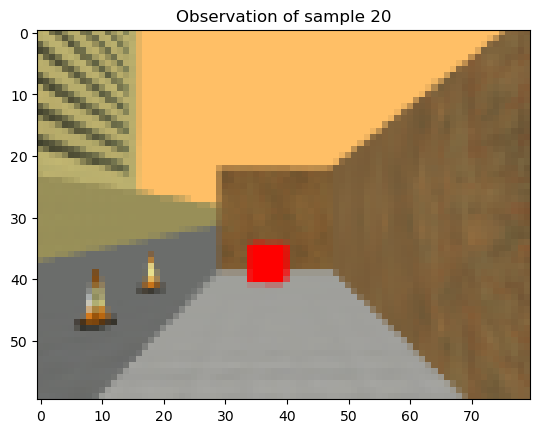

In [34]:
idx = 20 # sample index, should be in range [0, N-1]

print(f'Action of sample {idx}:                    ', actions[idx])
print(f'Time id when sample {idx} was recorded:    ', time_ids[idx])

plt.imshow(observations[idx])
plt.title(f'Observation of sample {idx}');

Note that the observation is just a low-resolution image of the simulated environment.

An action (label) is simply an integer. The three possible action values are:

In [35]:
ACTION_LEFT = 0  # Turn left
ACTION_RIGHT = 1 # Turn right
ACTION_FORWARD = 2  # Move forward

You can use the demonstration data to train and validate your machine learning methods.
Of course, you would first need to define some feature extraction procedure(s) to convert the observations into some suitable feature vectors for your machine learning techniques.

### Replay demonstrations

The following cell allows you to replay some of the demonstrations found in the dataset.

Study the demonstrations. 

 - Are you able to recognize a specific strategy employed by the human demonstrator to solve this environment? 
 - What would happen if different strategies were employed by the demonstrator? How does this relate to *irreducible error*?

If you were to collect demonstrations yourself, these are questions that you should take into account.

In [36]:
from matplotlib import animation
from IPython.display import HTML, display, clear_output
import ipywidgets


class ReplayDemos(animation.FuncAnimation):
    def __init__(self, demo_id):
        # np array with shape (frames, height, width, channels)
        self.video_init = np.array(complete_demonstrations[demo_id]['observations'])
        
        # Add black frames at the end of the video
        length_end = 20
        self.end_video = np.zeros(np.append(length_end, self.video_init.shape[1:]), dtype=int)
        self.video = np.append(self.video_init, self.end_video, axis=0)
        
        # Create figure
        self.fig = plt.figure()
        self.im = plt.imshow(self.video[0,:,:,:])
        
        plt.title('Replaying demonstration %i' % demo_id)
        plt.close() # this is required to not display the generated image
        
        # Init parent
        super().__init__(self.fig, self.animate, init_func=self.init, frames=self.video.shape[0], interval=50)
        
    def init(self):
        self.im.set_data(self.video[0,:,:,:])

    def animate(self, i):
        self.im.set_data(self.video[i,:,:,:])
        return self.im


def filter_demos(demonstrations, thr=50):
    # Remove all short demonstrations
    complete_demonstrations = []
    for demo in demonstrations:
        if demo['observations'].shape[0] > thr:
            complete_demonstrations.append(demo)
            
    return complete_demonstrations

complete_demonstrations = filter_demos(demonstrations, thr=50)

def replay_function(demo_id):
    clear_output(wait=True)
    replay_demos = ReplayDemos(demo_id)
    display(HTML(replay_demos.to_html5_video()))

ipywidgets.interactive(replay_function, demo_id=(0,len(complete_demonstrations)-1), continuous_update=False)

interactive(children=(IntSlider(value=1, description='demo_id', max=2), Output()), _dom_classes=('widget-inter…

## Testing your model in  the simulator


At some point, *after you have trained and evaluated your classifier*, you might want to check how well your classification method can actually control the robot. For this, you will need to wrap your trained classifier into a policy function that the simulator can use.

This section will go over the details of
* how to start the simulator;
* how to implement a policy `policy`;
* how to analyse the rewards.


### Running a simulation

The function `run_simulation` below will setup a simulation of your robot on a given environment (`env`) and will use the policy `policy` you provide to control the robot, for a maximum of `max_steps` simulation steps. The previously created environments `env = Sidewalk(time_id, max_episode_time_step=1000, rendering=False)` determine the environment and whether the simulation is shown in a popup-window. The simulation function can also record all the (observation, actions) pairs (`record_data=True`).

The function signature of `run_simulation` is:
```python
rewards = run_simulation(policy, env, max_steps=500, verbose=1, record_data=False, delay=0.0, seed=-1, human_control=False)
    """ Run robot simulation
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of Sidewalk] the environment to simulate
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation
    - max_steps     # [int] the maximum number of steps N to run the simulation
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    - seed          # [int] location generation random seed - only set if >=0
    - verbose       # [int] how much text gets printed: 0 = none, 1 = final stats, 2 = all
    - human_control # [True/False] if true the key presses will be passed on the policy
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
    """ 
```


In [37]:
# user key input handler
from pyglet.window import key
import time

# keep track if which keys have been pressed in the popup window
# (will be used later for the human control)
KEY_PRESSED = {key.LEFT: False, key.RIGHT: False, key.UP: False}

# define the set of all actions    
ACTIONS = [0, 1, 2]
ACTION_NAMES = ['turn_left', 'turn_right', 'move_forward']
NUM_ACTIONS = 3 # number of distinct actions

def run_simulation(policy, env, max_steps=500, verbose=1, record_data=False, delay=0.0, seed=-1, human_control=False):
    """ Run robot simulation
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of Sidewalk] the environment to simulate
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation
    - max_steps     # [int] the maximum number of steps N to run the simulation
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    - seed          # [int] location generation random seed - only set if >=0
    - verbose       # [int] how much texts gets printed: 0 = none, 1 = final stats, 2 = all
    - human_control # [True/False] if true the key presses will be passed on the policy
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
    """
    
    if verbose > 0:
        print(f'Starting simulation for {max_steps} steps.')
        if env.rendering:
            print('*** Press ESC key in popup window to stop the simulation! ***')
        print()

    if seed>=0:
        env.reset(seed=seed)
    else:
        env.reset(seed=int( time.time() * 1000.0 ))

    rewards = [] # will store the accumulated rewards
    observations = [] # will store the accumulated observations (only if record_data==True)
    actions = [] # will store the accumulated actions outputted by policy f (only if record_data==True)

    completed_steps = 0   
    
    
    try:
        # reset the simulation, and get the initial observation (robot "sensor measurement")
        obs = env.reinit(max_steps, wait_for_keypress=human_control)[0]
        
        # main simulation loop
        for step in range(max_steps):
            time.sleep(delay)
               
            if env.rendering:
                env.render()
            
            # get keyboard pressed button status from environment
            KEY_PRESSED.update(env.key_pressed)

            if env.stop_simulation: break
            
                
            # ** APPLYING YOUR POLICY **
            # execute the given policy on the observation to determine the robot's action
            action = policy(obs)
            
            # sanity check: is the policy implemented correctly?
            assert (isinstance(action, (int, np.integer))) # returned action should be a builtin or numpy integer
            assert (action in ACTIONS) # action should be an integer 0, 1, 2 or 3
            
            if verbose > 1:
                print(f'step {step}: action = {ACTION_NAMES[action]}')

            if record_data:
                # only store all the observation and action pairs during the simulation
                #   if the record_data argument is set to True
                observations.append(obs)
                actions.append(action)

            # execute simulation step with the given control input
            obs, reward, environment_done, _, info = env.step(action)
            completed_steps += 1
            
            if verbose > 1:
                print(f'step {step}: reward = {reward}')

            # collect all rewards in a list
            rewards.append(reward)

            # exit simulation when goal is reached
            if environment_done:
                break

    finally:
        # close the pop-up window,
        if env.rendering:
            env.close()
            env.window = None
        
    rewards = np.array(rewards)
    total_reward = np.sum(rewards)
    
    if verbose > 0:
        print(f'total reward after {completed_steps} steps: {total_reward}')
        print(f'average reward: {total_reward/completed_steps}')
    
    if record_data:
        return rewards, np.array(observations), np.array(actions, dtype=int)
    
    # by default, only return the rewards
    return rewards

The function `test_policy` below will run the `policy` in given environment (`env`) for a number `no_runs` different initial configurations. This function ensures that always the same set of configurations is used, allowing you to reproducibly compare the performance of different policies.

The function signature of `test_policy` is:
```python
no_completed, avg_reward = test_policy(policy, env, verbose=0, no_runs=10)
    """ Test a policy
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of Sidewalk] the environment to simulate
    - verbose       # [int] how much text gets printed: 0 = none, 1 = final stats, 2 = all
    - no_runs       # [int] how many configurations to evaluate
    
    Returns:
    - no_completed  # [int] number of runs in which the goal was reached
    - avg_reward    # [float] average reward over the runs
    """ 
```

In [38]:
def test_policy(policy, env, verbose=0, no_runs=10):
    """ Test a policy
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of Sidewalk] the environment to simulate
    - verbose       # [int] how much text gets printed: 0 = none, 1 = final stats, 2 = all
    - no_runs       # [int] how many configurations to evaluate
    
    Returns:
    - no_completed  # [int] number of runs in which the goal was reached
    - avg_reward    # [float] average reward over the runs
    """ 
    
    no_completed = 0
    avg_reward = 0.0
  
    seeds = range(0,no_runs)
    run_count = 1
    for seed in seeds:
        print('Run %i / %i' % (run_count, no_runs))
        success = False
        run_count += 1
        rs = run_simulation(
            policy,
            env,
            record_data=False,
            verbose=verbose, 
            max_steps=100, 
            delay=0.0,
            seed=seed)

        avg_reward += np.mean(rs)
        if np.sum(rs) > 0:
            no_completed += 1
            success = True
            
        print('Success:', success)
    
    avg_reward /= float(no_runs)
    
    print()
    print(f'average reward: {avg_reward}')
    print(f'reached target: {no_completed} / {no_runs}')
    
    return no_completed, avg_reward

### Implementing a policy

For the simulator, $policy(observation) \rightarrow action$ should be implemented as a plain python function which takes a numpy array as input (the observation) and returns an integer (the action).
So generally, a policy implementation would look like this:

```python

def policy(observation):    
    """
    Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    Output: action,     an integer representing the action (0 = Left, ... 2 = Forward)
    N.B.: actions is just an int, NOT a numpy array
    """ 
    
    # YOUR CODE
    #   convert observation to feature vector
    #   predict action class given the feature vector using some ML technique
    
    return action
```
*Of course, don't name you policy just `policy`, but give it some more descriptive name!*

To illustrate, here is a dummy policy which just picks a random actions (without actually looking at the observation).

In [39]:
# a dummy policy
def policy_dummy(observation):
    """ Dummy policy function, which just returns random action. 
    
    Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    Output: action,     an integer representing the action (0 = Left, ... 2 = Forward)
    N.B.: actions is just an int, NOT a numpy array
    """
    
    # in this dummy policy, we ignore the observation and just select a random action
    action = np.random.randint(0, NUM_ACTIONS)
    
    # print(f'Received observation: {observation.shape} numpy array of type {observation.dtype}, returning action {action}')
    return action

We can confirm that the policy returns a valid action label:

In [40]:
action = policy_dummy(observations)

# returned action should be a builtin int or a numpy integer (NOT a numpy array) in the range [0, 2]
assert (isinstance(action, (int, np.integer)))
assert (action in ACTIONS) # ACTIONS is the set of possible action labels, [0,1,2]

### Reward

To quantify how well a policy is working, the simulator will return the *rewards* that the robot collected at each simulation step. The rewards determine how well you are doing, and are based on whether or not you reach the target (red cube) or not and how quickly you do so:

* The robot receives a reward of 0 when not reaching the target within the given maximum number of steps.
* The robot receives a reward of 1 when reaching the target, at which time also the episode ends. The robot also gets a small malus for the number of steps it needs to reach the target, as a penalty for spending time. The equation for this is: 1.0 - 0.2 * (step_count / max_episode_steps)

Overall, the goal is to reach the red cube as quickly as possible.

### Illustration of running the simulator with the dummy policy

Let's try to run the simulation with the dummy policy, and render the output in the popup-window for 100 steps.

In [41]:
time_id = 1 # <-- CHANGE THIS to select the time; can be 0, 1, 2

if show_policy:
    # running the simulation with the dummy policy
    rs = run_simulation(policy_dummy, envs[time_id], max_steps=100)

Clearly, this policy does not do anything particularly useful, and should make the robot just move around randomly. Let's visualize the rewards that the robot collected during the simulation.

The first plot below shows when the reward is collected. The second plot shows the total/cumulative reward. You will probably see two flat lines as the dummy policy did not accumulate any rewards. This is indicative of a bad policy.

In [42]:
if show_policy:
    plt.figure(figsize=(10,4)) # create a wide figure (size 10) which is not so tall (size 4)
    plt.subplot(1,2,1) # create subplot of 1 row, 2 columns, enable plotting in first cell
    plt.plot(rs)
    plt.xlabel('steps')
    plt.ylabel('reward')
    plt.title('Reward per step')
    plt.grid()

    plt.subplot(1,2,2) # create subplot of 1 row, 2 columns, enable plotting in first cell
    plt.plot(np.cumsum(rs)) # Cumulative sum of rewards
    plt.xlabel('steps')
    plt.ylabel('total reward')
    plt.title('Cumulative reward')
    plt.grid()

    print('Average reward:', np.mean(rs))

For comparing and evaluating classifiers, measure the performance of the classifiers themselves, i.e., the macro-F1 score.

Still, the simulation and rewards can help you assess in what situations your robot AI is performing well, and when it is failing. For this use the function `test_policy`, with the default 10 runs.

In [43]:
no_completed, avg_reward = test_policy(policy_dummy, envs_norender[time_id])

Run 1 / 10
Success: False
Run 2 / 10
Success: False
Run 3 / 10
Success: False
Run 4 / 10
Success: False
Run 5 / 10
Success: False
Run 6 / 10
Success: False
Run 7 / 10
Success: False
Run 8 / 10
Success: False
Run 9 / 10
Success: False
Run 10 / 10
Success: False

average reward: 0.0
reached target: 0 / 10


# Collecting new demonstrations

At some point, you might want to collect more human demonstration data to make your method even better.
You can do this by:

- manually controlling the robot in the simulation yourself to generate new demonstrations
- recording the resulting (observation, action) pairs during these demonstrations
- saving the good demonstrations to disk to increase your example dataset

The code below demonstrates how to do this. The idea is simple: just use the regular `run_simulation()` function, but use a special `policy_human()` policy which simply returns the action based on the keyboard input!

In [44]:
# a human
def policy_human(observation):
    # Get the action obtained by the key_press/key_release callbacks from the popup window.
    # Note that the human demonstrator (you!) will of course see the environment image in the popup window,
    # and ignore the 'observation' input of this function.
    # This 'human policy' will therefore return your 'action' response to the visual input by checking
    # which keyboard arrows you pressed.
    # Note 1: As we don't have an idle action, the time will only progress when you press a key
    # Note 2: If you press and key except the arrow keys or ESC, the policy sanity check will fail

    if KEY_PRESSED[key.LEFT]: return ACTIONS[0]
    elif KEY_PRESSED[key.RIGHT]: return ACTIONS[1]
    elif KEY_PRESSED[key.UP]: return ACTIONS[2]

When we use this policy, ensure that the simulator stores and returns all the (observation, action) pairs by setting the `record_data` argument of run_simulation to `True`.
You can adjust the `time_id` to get human demonstrations at a variety of times during the day for the training environment. If you want a reproducible initial configuration, you can also set a `seed`.

In [45]:
collect_demo = False

if collect_demo:
    time_id = 1 # <-- CHANGE THIS to select the time; can be 0, 1, 2
    # NOTE: if an interactive widget is active, this simulation will run slower

    rs, rec_obs, rec_actions = run_simulation(
        policy_human,          # by using the 'human' policy, YOU determine the robot's actions based on what you see
        record_data=True,      # record and return all (observation, action) pairs from the simulation 
        env=envs[time_id],     # which environment to use
        max_steps=1000,        # maximum number of steps to run the simulation
        human_control=True,    # when controlling the robot manually
        delay=0.07,            # adding a small delay will help you control the robot
    )
    # Note: with delay=0.05 the simulation runs a bit slower, which makes it easier to give demonstrations

else:
    rec_obs = observations
    rec_actions = actions

SAVE_DEMO = False # <-- CHANGE THIS to 'True' to SAVE the last recording to disk!

if SAVE_DEMO: 
    rec_N = rec_obs.shape[0]

    demonstration = {
        'observations': rec_obs,
        'actions': rec_actions,
        'time': time_id * np.ones(rec_N, dtype=int),
    }

    # include date+time to filename in YYYYMMDD_HHMMSS format
    import datetime
    now = datetime.datetime.now()
    dt_str = now.strftime('%Y%m%d_%H%M%S')

    # Save to disk
    save_filename = f'demonstrations/demostud-{time_id}-{dt_str}.pickle'
    print(f'Saving demonstration of time {time_id} to {save_filename} ...')
    with open(save_filename, 'wb') as fd:
        pickle.dump(demonstration, fd)

Explore the just collected samples using an interactive slider (if you didn't collect new data you'll explore the pre-recoded demonstrations instead)

In [46]:
def plot_sample(idx, observations, actions):
    obs = observations[idx]
    action = actions[idx]
    plt.clf()
    plt.imshow(obs)
    plt.title(f'{idx}: {action}');

ipywidgets.interactive(lambda idx: plot_sample(idx, rec_obs, rec_actions),
                       idx=(0,rec_obs.shape[0]-1))

interactive(children=(IntSlider(value=260, description='idx', max=521), Output()), _dom_classes=('widget-inter…

If you are unhappy with the the demonstration you gave, you can just execute the `run_simulation()` cell above again, until you are satisfied.

To save the demonstration to disk, execute the cell below after setting `SAVE_DEMO` to True.

**After you have saved the demonstration, don't forget to afterwards IMMEDIATELY set `SAVE_DEMO` back to False to avoid accidentally saving new demonstrations every time you rerun the notebook!!!**

Note that the pickle filenames of your recordings will start with `demostud-`, while the originally provided demonstrations start with `demo-`. This makes it easy to load only the original, your, or both types of recordings.

In [47]:
SAVE_DEMO = False # <-- CHANGE THIS to 'True' to SAVE the last recording to disk!

if SAVE_DEMO: 
    rec_N = rec_obs.shape[0]

    demonstration = {
        'observations': rec_obs,
        'actions': rec_actions,
        'time': time_id * np.ones(rec_N, dtype=int),
    }
    
    # include date+time to filename in YYYYMMDD_HHMMSS format
    import datetime
    now = datetime.datetime.now()
    dt_str = now.strftime('%Y%m%d_%H%M%S')

    # Save to disk
    save_filename = f'demonstrations/demostud-{time_id}-{dt_str}.pickle'
    print(f'Saving demonstration of time {time_id} to {save_filename} ...')
    with open(save_filename, 'wb') as fd:
        pickle.dump(demonstration, fd)

Ok, that completes the example code.
Now it is your turn! Implement your solution to the final assignment below. For full points, make sure you address *all* the numbered items for each section, either by implementing something in code cells, or by providing text in Markdown cells. You are free to add as many code and markdown cells as required. Be sure to first read through all sections before you start, so you know what should go where. We are *not* using nbgrader for this final assignment.

**When you are done, double check the "Deliverables" section at the start of this notebook on how to prepare your final submission!**

Good luck!


---

# 1. Explore & Inspect the Data (5 points)
In this section you should only use the ORIGINALLY provided demo files (i.e. 'demo-*-*.pickle')

Add code and markdown cells to address all of the following points:

1. Create a visualization that shows three samples from each time of day for which you have demonstrations. <span style="float: right;">(0.5 pt)</span>
2. Explain in words what you observe: how do the observations from the times of day vary? <span style="float: right;">(0.5 pt)</span>
3. Are the samples i.i.d.? What does that imply for splitting your data? <span style="float: right;">(1 pt)</span>
4. Is there a class imbalance? If yes, what are procedures to deal with that? <span style="float: right;">(1 pt)</span>
5. Do we have a high risk of conflicting labels for observations? What problems can this cause? <span style="float: right;">(1 pt)</span>
6. The data was collected from human demonstrations. What are potential issues with this way of collecting data? <span style="float: right;">(1 pt)</span>

 

In [48]:
# Look for all the demonstration pickle files in the demonstrations/ directory.
#  The originally provided demo files are called: demo-[time_id]-[datetime].pickle
#  Any demo files you record yourself are called: demostud-[time_id]-[datetime].pickle

# CHANGE THIS IF NEEDED: select the pickle file pattern to match ...

DEMO_FILEPATTERN = 'demo-*-*.pickle'      # only use ORIGINALLY provided demo files
#DEMO_FILEPATTERN = 'demostud-*-*.pickle'  # only use YOUR own collected demo files
#DEMO_FILEPATTERN = 'demo*-*.pickle'        # use ALL available demo files

# find the relevant filenames
filenames = glob.glob(f'demonstrations/{DEMO_FILEPATTERN}')
filenames.sort() # ensure the order is well-defined
print(f'Found {len(filenames)} demonstrations')

# in a loop, load the found pickle files
demonstrations = []
for filename in filenames:
    with open(filename, 'rb') as fd:
        demonstration = pickle.load(fd)
        
        actions = demonstration['actions']
        demonstrations.append(demonstration)
        
print("Done!")

Found 76 demonstrations
Done!


In [49]:
# we can combine all the observations, actions, and time ids

observations = np.concatenate([d['observations'] for d in demonstrations])
actions = np.concatenate([d['actions'] for d in demonstrations])
time_ids = np.concatenate([d['time'] for d in demonstrations])

# pre-processing: subsample and only keep every n-th sample for efficiency
# this can speed up training
ss = 1
observations = observations[::ss]
actions = actions[::ss]
time_ids = time_ids[::ss]

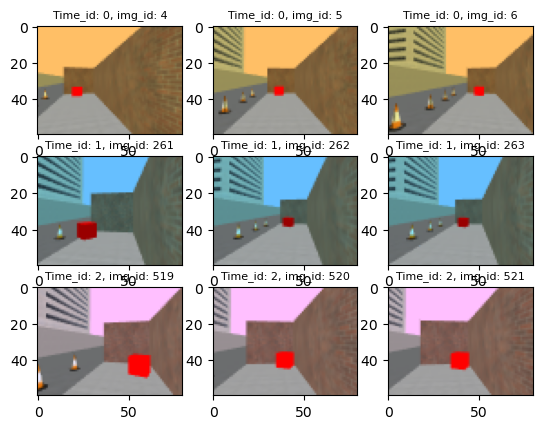

In [50]:
idx = []
idx.append(list(range(4,7)))
idx.append(list(range(int(time_ids.shape[0]/2), int(time_ids.shape[0]/2)+3)))
idx.append(list(range(time_ids.shape[0]-3, time_ids.shape[0])))

fig, axs = plt.subplots(3, 3)



for j in range(3):
    for i in range(3):
        axs[j, i].imshow(observations[idx[j][i]])
        axs[j, i].set_title(f"Time_id: {time_ids[idx[j][i]]}, img_id: {idx[j][i]}")
        axs[j, i].title.set_size(8)

# 1.2 Observations from data

When examining the images gathered from the observations. the following similarities and differences can be found:

1. For each time of day the environment regarding cones and walls do not change
2. For each new sample the position of the red cube may change
3. For each sample the intial orientation of the robot changes
4. The images for each time of day only differ in **hue**

# 1.3 Are the samples i.i.d?

The demo files in the demonstration folder are sorted from time id 0 to 2, and the list 'observations' simply concatenates all the observations within demonstrations. This means that our observation samples will also be sorted from timeid 0 to 2. Resulting in a sample that is **not** i.i.d.

Splitting the data mean taking every n-th element of a list. In our case since the list is sorted, if we split it the resulting list will have the same distribution of time ids as the original list. However this is still not i.i.d. therefore we should shuffle the data. 

In [51]:
N_time0 = np.count_nonzero(time_ids == 0)
N_time1 = np.count_nonzero(time_ids == 1)
N_time2 = np.count_nonzero(time_ids == 2)

print(f"The number of samples with timeid 0:  {N_time0}")
print(f"The number of samples with timeid 1:  {N_time1}")
print(f"The number of samples with timeid 2:  {N_time2}")

The number of samples with timeid 0:  180
The number of samples with timeid 1:  191
The number of samples with timeid 2:  151


# 1.4 Is there a class imbalance?

There is a class imbalance in our observations as there are fewer samples of timeid = 2 compared to timeid = 0 and 1. This can be by adressed by gathering more data with timeid = 2. 

There is also a class imbalance between the actions in each demonstration, as it is more common to go forwards instead of turning.

If gathering more samples is not possible, a different option is to undersample the majority class. In our case this means taking fewer samples of timeid 0 and 1 to match that of timeid 2, and to take fewer forwards samples and more turning samples. This however means a loss of information.

Similarly you can also oversample timeid 2, so duplicating random samples with timeid 2 to increase the sample size. This however can result in overfitting.

## 1.5 Do we have a high risk of conflicting labels for observations? What problems can this cause?

As all data is generated by humans, a lot of different actions are taken in (basically) the same observation. This could cause conflicting labels, as the training data itself is conflicting. The noise by measurement techniques or in sensor data will be minimal though, which means that all noise probably comes from the human operator.

## 1.6 The data was collected from human demonstrations. What are potential issues with this way of collecting data?

By using humans to generate data it most certainly will not be the most efficient path to the red cube, as humans often do not take the shortest path to the red cube. Using human generated data could also mean a lot of conflicting data, as mentioned before, where some human might take a left, others might take a right.

# ---

# 2. Prepare the Data and Evaluate Features (15 points)

In this section you should only use the ORIGINALLY provided demo files (i.e. 'demo-*-*.pickle'). You should pre-process the data, e.g., down-sample, and extract features to create your training data matrix "X".

<div class="alert alert-block alert-warning">
Remember to provide thorough insights, analysis and reasoning behind your design choices and what you see as a consequence of these choices. Try to synthesize rather than describing what you did step by step.
</div>

## 2.1. Clustering observations from times of day (6 points)

Before we turn towards the main task of action classification (section 2.2), let us first try a small unsupervised clustering task. Pretend that we only have the observations, but did not record the time_ids of these observations. The goal is to cluster the observations into k=3 clusters such that 1 cluster (approximately) corresponds to 1 time of day. For this task, you can ignore the actions and time_id information.

1. Propose a feature extraction method `feat_extract_clust` which can be used to CLUSTER the samples and (approximately)<br> recover the time_ids. Motivate what you use in your feature extraction method. <span style="float: right;">(2 pt)</span>
2. Perform clustering based on the features obtained with `feat_extract_clust`, and compare the results to the true time_id<br> labels. For this you will need to select a statistical measure to compare cluster labels to time_ids. <span style="float: right;">(1 pt)</span>
3. Explain what measure you use for comparing the features and why. <span style="float: right;">(2 pt)</span>
4. Can you recover the time_ids by clustering? Motivate your answer with your results. <span style="float: right;">(1 pt)</span>

# 2.1.1 Feature extraction method

Considering we can't use the timeids to determine the time of day, we have to do feature extraction on the RGB images.

Because the the images only differ in hue, we can make the image feature transformation from RGB format to HSV format. Where HSV is hue, saturation and value. The transformation from RGB to HSV does not affect the dimensionality of the feature space, therefore making it a suitable option for clustering based on hues.

In [52]:
# 2.1.2 Clustering

from matplotlib.colors import rgb_to_hsv
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

shuffled_obs, shuffled_actions, shuffled_time_ids = shuffle(observations, actions, time_ids, random_state=0)

def feat_extract_clust(observations):
    obs_f = []
    for obs in observations:
        # Convert RGB to HSV, extract only H value and flatten image to feature vector
        obs_f.append(rgb_to_hsv(obs)[:,:,0].flatten())
    
    # Run KMeans on the modified set
    kmeans = KMeans(n_clusters=3, random_state=2)
    y_pred_km = kmeans.fit_predict(obs_f)
    return y_pred_km

y_pred_km = feat_extract_clust(shuffled_obs)

print(classification_report(shuffled_time_ids, y_pred_km))

C:\Users\Dielof\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       180
           1       0.94      0.99      0.96       191
           2       1.00      0.76      0.86       151

    accuracy                           0.93       522
   macro avg       0.94      0.92      0.92       522
weighted avg       0.93      0.93      0.92       522



# 2.1.3 Method for comparing features

We made the feature transformation from RGB to HSV and did clustering based on the hue of the image. When comparing features, we can compare the hue of two samples. 

Where colours in RGB  is defined in a 'colour cube' (meaning R, G and B are all linear), HSV is defined in a colour hexdome. Here the hue is defined in a circular colour space, and the saturation and value are linear. Meaning that when we want to compare two different hues, we should take the angular distance between them. A small angular distance between two features mean they have similar hue and a large angular distance means that the hue is different.

# 2.1.4 Can you recover time_ids by clustering?

Observing the classification report, the accuracy of the KMeans clustering is fairly high at 0.92 but is not perfect. With more fine-tuning this accuracy can be improved however likely not to an accuracy of 1.0. Therefore the time_ids can not be recovered by clustering.

## 2.2. Features for action classification (9 points)

Now we turn to feature extraction for the main classification task, which you can reuse also in the later sections of this notebook.

1. Explain: Will you use the same extractor as in step 1; Why (not)? <span style="float: right;">(2 pt)</span>
2. Propose a feature extraction method `feat_extract` which you will use in the subsequent sections to classify *action*, rather<br> than time_ids. <span style="float: right;">(1 pt)</span>
3. Explain: Are there any important hyperparameters in your feature extractor? <span style="float: right;">(2 pt)</span>
4. Explain: How will you decide on the values for these hyperparameters? What is the trade-off if this hyperparameter is either (too)<br> low or (too) high? <span style="float: right;">(2.5 pt)</span>
5. Explain: What is the dimensionality of your feature space? <span style="float: right;">(0.5 pt)</span>
6. Apply your `feat_extract` to all observations to create the data that you will use in the subsequent sections. <span style="float: right;">(1 pt)</span>

In [53]:
# Add code and markdown cells



### 2.2.1 Explain: Will you use the same extractor as in step 1; Why (not)?

No, we will not use the same feature transformation. Because the previous extractor was purely to determine the time_id. To determine the correct action the robot must take different features are of importance. Therefore a different feature extraction method must be used.

### 2.2.2 Propose a feature extraction method feat_extract which you will use in the subsequent sections to classify action, rather than time_ids.

Because the cube is red and quite distinct from its environment regarding colour, a viable feature extraction method would be colour image segmentation in the HSV colour space. From there you could recognise the cube and create a mask from it. By training a classifier with these masks, the classifier will learn to walk towards the red cube.

Additionally we could also provide the classifier with a grayscale image. This to prevent walking into the wall or off the sidewalk. A grayscale image would be better suited than the original image, as removing color would reduce it's dimension (which boosts training performance) and will also weaken the impact of the different time of days, as the impact of color difference will be reduced.

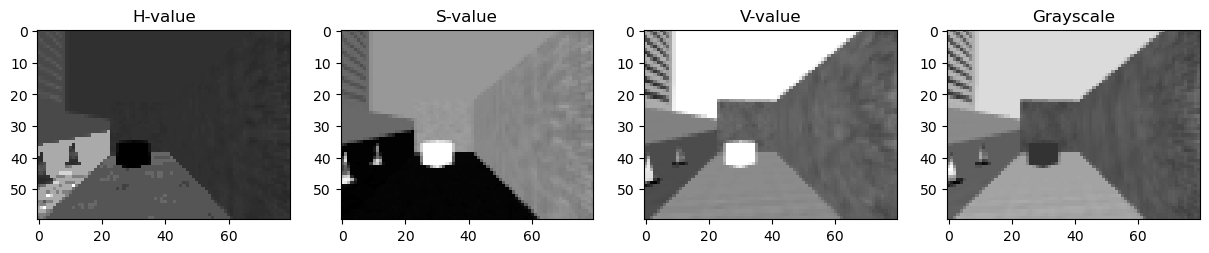

In [54]:
idx = 100

obs_hsv = rgb_to_hsv(observations[idx])
fig, ax = plt.subplots(1, 4, figsize=(15,5))
ax[0].imshow(obs_hsv[:,:,0], cmap='gray')
ax[0].set_title('H-value')
ax[1].imshow(obs_hsv[:,:,1], cmap='gray')
ax[1].set_title('S-value')
ax[2].imshow(obs_hsv[:,:,2], cmap='gray')
ax[2].set_title('V-value')
ax[3].imshow(np.dot(observations[idx][...,:3], [0.299, 0.587, 0.114]), cmap='gray')
ax[3].set_title('Grayscale')
plt.show()


### 2.2.3 Explain: Are there any important hyperparameters in your feature extractor?

For colour image segmentation in HSV color space we first want to convert the image into HSV color space like was done previously. To implement the segmenting we need to define some thresholds for hue and saturation. These thresholds determine which parts of the image we want to include in the mask and are thus hyperparameters.

By experimenting with the threshold values in the code cell below we can determine these hyperparameters.

For the grayscale conversion the hyperparameters might be less obvious, but we can also tweak the formula for converting RGB to grayscale. As the standard grayscale conversion parameters work sufficiently for now, we'll continue with those.

### 2.2.4 Explain: How will you decide on the values for these hyperparameters? What is the trade-off if this hyperparameter is either (too) low or (too) high?

As our red cube is represented by a low hue and a high saturation, as can be seen in the images above, we will want to start with a mask that separates everything under a low H-threshold and everything above a high S-threshold and work our way until a red cube becomes visible.

Depending on how broad you define the threshold you will accept more or less colours in the feature extraction. A larger threshold will also allow orange hues for example. A smaller threshold on the other hand will only accept 'pure' red colours. 

This can become an issue with the cones, as the cones are orange, which comes close to our red. It can be seen in the images above both the cones and the cube have similar values for H and S.

### 2.2.5 Explain: what is the dimensionality of your feature space

As we will generate a mask and a grayscale image as our features (both images with one value per pixel), where both images can be flattened to feature vectors (1-dim), our feature space will be 2-dim as 2x 1-dim vectors make a 2-dim feature space.


### 2.2.6 Apply your feat_extract to all observations to create the data that you will use in the subsequent sections.

In [55]:
# Color segmentation
#
# As you can see, using the HSV color space produces some promising results for segmenting the red cube.
# Only once time_id 2 is reached this falls apart, as the gray color of the sidewalk gets detected.
# As we only focus on time_id 1 for now, we keep this issue to solve another time

threshold_h = 0.02
threshold_s = 0.34

def calculate_com(mask):
    if not np.any(mask):
        # return none if mask is empty
        return None    
    
    mass_x, mass_y = np.where(mask)
    # Use median instead of average to be more noise robust
    cent_x, cent_y = np.median(mass_x), np.median(mass_y)
    return int(cent_x), int(cent_y)

def cube_mask(obs, threshold_h, threshold_s):
    # Convert observation to HSV and generate a mask where H < threshold_h
    obs_hsv = rgb_to_hsv(obs)
    h_mask = obs_hsv[:,:,0] < threshold_h
    s_mask = obs_hsv[:,:,1] > threshold_s
    mask = h_mask*s_mask
    return mask
    
    
def plot_sample(idx, observations, threshold_h):
    obs = observations[idx]
    mask = cube_mask(obs, threshold_h, threshold_s)

    # Generate figures showing original, H-value and mask
    plt.clf()
    fig, ax = plt.subplots(1, 4, figsize=(15,5))
    ax[0].imshow(obs)
    ax[0].set_title(f'Observation in HSV: {idx}')
    ax[1].imshow(rgb_to_hsv(obs)[:,:,0], cmap='gray')
    ax[1].set_title('H-value')
    ax[2].imshow(rgb_to_hsv(obs)[:,:,1], cmap='gray')
    ax[2].set_title('S-value')
    ax[3].imshow(mask)
    ax[3].set_title(f'Mask with threshold {threshold_h}')
    
    
    # To use basic logic to steer we can calculate the Center of Mass, but not needed when training a classifier.
    # We now know how to detect the red cube. 
    # To steer towards it we need to calculate the center of the mask
    # If the red cube is not in frame, do not calculate a CoM.
    if np.any(mask):
        com = calculate_com(mask)
        ax[3].plot(com[1], com[0], 'r+', markersize=15)
    plt.show()
    

ipywidgets.interactive(lambda idx: plot_sample(idx, observations, threshold_h),
                       idx=(0,observations.shape[0]-1))

interactive(children=(IntSlider(value=260, description='idx', max=521), Output()), _dom_classes=('widget-inter…

In [56]:
threshold_h = 0.02
idx=10
from sklearn.preprocessing import StandardScaler

def feat_extract(obs):
    # Extract all necessary features for classifier training
    # Currently we use 
    #   1. Mask generated from HSV 
    #   2. Grayscale image
    features = []
    mask = cube_mask(obs, threshold_h, threshold_s)
    scaler = StandardScaler()
    mask_scaled = scaler.fit_transform(mask)
    features.append(mask.flatten())
    
    grayscale = np.dot(obs[...,:3], [0.299, 0.587, 0.114]) 
    scaler = StandardScaler()
    grayscale_scaled = scaler.fit_transform(grayscale)
    
    features.append(grayscale_scaled.flatten())
    return np.concatenate(features)

features = feat_extract(observations[idx])

In [57]:
# Extract all features from each observation and put them together in extracted_obs

def feat_extract_all(observations):
    extracted_obs = [feat_extract(obs) for obs in observations]
    return np.array(extracted_obs)

print(feat_extract_all(observations).shape)

(522, 9600)


----

# 3. Single Time of Day Action Classification  (35 points)
To get started, we will train and test a model that is only suitable for operating at a single time of day, i.e., at Time 1

As a first step split the data into a training, validation, and test set. You can use the originally provided data, or collect your own.

<div class="alert alert-block alert-warning">
Remember to provide thorough insights, analysis and reasoning behind your design choices and what you see as a consequence of these choices. Try to synthesize rather than describing what you did step by step.
</div>


## 3.1. Shortlist Promising Models (25 points)
1. Compare at least 2 models. One of them needs to be a neural network, one of them needs to be not a neural network.<span style="float: right;">(3 pt)</span>
2. For each of the models that you are going to compare, explain what are its relative advantages/disadvantages in terms of training<br> time, test time, and number of model parameters compared to the other choices. Also explain how these considerations relate to<br> the target application, and motivate which type of model would be preferred based on these considerations only (so disregarding<br> the actual quality of the models). <span style="float: right;">(10 pt)</span>
3. If needed, perform dimensionality reduction before training your selection models. Explain why it is (not) needed.<span style="float: right;">(1.5 pt)</span>
4. Roughly tune those models<span style="float: right;">(1 pt)</span>
5. Evaluate the models in terms of performance, bias, variance, etc.<span style="float: right;">(5 pt)</span>
6. Please use the macro-F1 score (see sklearn documentation) as your main criterion. Looking at confusion matrices, accuracy etc.<br> might also provide valuable insights. Why is the accuracy score potentially problematic in this setting?<span style="float: right;">(1.5 pt)</span>
7. Pick one algorithm to develop further. Motivate your choice of algorithm with your results.<span style="float: right;">(3 pt)</span>


## 3.1.2 Comparing models

For this exercise we will be comparing two models, one Random Forest (RF) classifier and one neural network (NN). These two models will be compared and contrasted with regards to the following criteria: 

1. Training time
2. Test time
3. Number of model parameters

### Motivation for random forest classifier
When finding the most suitable model for this task, a natural way to assess it is to compare how that model behaves compared to a human user. Broken down in a few simple steps; a human user would do the following:

Observe the image:
    
    If they see a red cube:
        If the cube is in the middle:
            Walk forward
        Else:
            Turn right or left (until cube is in the middle)
    Else:
        Turn right or left
        
With this in mind, a logical model choice would be a Decision Tree (DT). The way a Decision Tree evaluates its splitting criteria to move to the following leaf nodes shows much similarity to the simple decision-logic that is required for this task. 

A random forest is an ensemble of decision trees. Therefore a Random Forest classifier will show improved accuracy and be less prone to overfitting compared to Decision Trees. This however comes at the cost of training and test time because of the larger scope of Random Forests. The Random Forest will also have more model parameters compared to Decision Trees and will therefore be more complex.

### Training time, RF vs NN
While training time for a RF will be longer than for a DT, compared to neural networks, it is much faster. Training a NN, especially one with many layers will be more time consuming and more computationally expensive.

### Test time, RF vs NN
Predicting for RFs involves a series of predictions for multiple decision trees. These are relatively simple computations. NNs on the other hand must go through many complex operations through multiple layers. This means that predicting for NN will take longer.

### Number of model parameters, RF vs NN
The number of parameters for RFs scales with the number of decision trees. The number of parameters for a NN scales with the no. of nodes within each layer, the number of layers and the general structure of the NN (choice of optimizer, loss, activation function etc.) The number of parameters will depend on the depth of each classifier. Though generally NN will have more model parameters.

### Conclusion
Based on the training time, test time and model parameters; RF seems like the most viable option. It should take less training and test time, and will have fewer model parameters than NNs.

### 3.1.3 Dimensionality reduction

The images are 60 x 80 with 3 RGB values. so if you were to feed the raw image data into a model, the input data would have 60x80x3 = 14400 features. This is a very large number of features and will result in slower training time and is likely to affect the solution quality. 

To reduce the number of dimensions, two methods can be applied: colour image segmentation and principal component analysis (PCA). 

Colour image segmentation as discussed in section 2.2.2. makes a mask around the object. This results in a vector which consists of 1s at the location of the object, and 0s elsewhere. This reduces the three RGB values to a single binary value. Therefore the resulting input data has a feature space of 4800 dimensions.

PCA: Applying PCA reduces the image size while maintaining (most of) the image information. By reducing the image size, the feature space can be vastly reduced. For this task we decided to not implement PCA, because the total training time is still low with 9600 dimensions (grayscale + mask image). Additionally, PCA will result in information loss (albeit quite small if n_components is chosen appropriately), meaning worse performance. With these reasons in mind, PCA was deemed unnecessary for the task at hand.

### 3.1.4 Roughly tune these models

We'll start with setting up neural networks and tune them till they sometimes work. After that we'll set up a RF classifier that sometimes works and compare the two models.

In [58]:
# Look for all the demonstration pickle files in the demonstrations/ directory.
#  The originally provided demo files are called: demo-[time_id]-[datetime].pickle
#  Any demo files you record yourself are called: demostud-[time_id]-[datetime].pickle

# CHANGE THIS IF NEEDED: select the pickle file pattern to match ...

#DEMO_FILEPATTERN = 'demo-*-*.pickle'      # only use ORIGINALLY provided demo files
#DEMO_FILEPATTERN = 'demostud-*-*.pickle'  # only use YOUR own collected demo files
DEMO_FILEPATTERN = 'demo*-*.pickle'        # use ALL available demo files

# find the relevant filenames
filenames = glob.glob(f'demonstrations/{DEMO_FILEPATTERN}')
filenames.sort() # ensure the order is well-defined
print(f'Loading {len(filenames)} demonstrations')

# in a loop, load the found pickle files
demonstrations = []
for filename in filenames:
    with open(filename, 'rb') as fd:
        demonstration = pickle.load(fd)
        
        actions = demonstration['actions']
        #print(f'Loaded {actions.shape[0]} samples from {filename} ...')
        
        demonstrations.append(demonstration)
print("Done!")

Loading 202 demonstrations
Done!


---

To solve the issue of the class imbalance, we can oversample the turning behaviour, a.k.a. multiply entries where we should turn. The multiplier could also be seen as a hyperparameter and can thus be tuned in the next paragraph.

In [59]:
# only get time_id 1
observations = np.concatenate([d['observations'] for d in demonstrations if any(d['time'] == 1)])
actions = np.concatenate([d['actions'] for d in demonstrations if any(d['time'] == 1)])
time_ids = np.concatenate([d['time'] for d in demonstrations if any(d['time'] == 1)])


# pre-processing: oversample turning motion to compensate class imbalance
obs_2 = observations[actions==2]
obs_r = observations[actions!=2]
act_2 = actions[actions==2]
act_r = actions[actions!=2]

# oversample turning by 1.5x
processed_obs = np.concatenate((obs_2, obs_r, obs_r[::2]))
processed_acts = np.concatenate((act_2, act_r, act_r[::2]))

In [60]:
from sklearn.model_selection import train_test_split

# Prepare dataset by shuffling and splitting to a test and train set
shuffled_obs, shuffled_actions = shuffle(processed_obs, processed_acts, random_state=0)

features = feat_extract_all(shuffled_obs)

X_train, X_test, y_train, y_test = train_test_split(features, shuffled_actions, test_size = 0.20, random_state = 0)


### Neural network

In [61]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model with input_dim 9600 (2x an image)
keras.utils.set_random_seed(0)
model = Sequential()
model.add(Dense(64, input_dim=9600, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

loss_fn = keras.losses.BinaryCrossentropy()
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss=loss_fn, metrics=['accuracy'])

y_train_onehot = keras.utils.to_categorical(y_train, num_classes=3)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=3)

In [62]:
%timeit -r 1 -n 1 model.fit(X_train, y_train_onehot, epochs=20)

model.evaluate(X_test,  y_test_onehot, verbose=2)

predictions = model.predict(X_test)
y_pred_nn = []

for pred in predictions:
    y_pred_nn.append(np.argmax(pred))
    
y_pred_nn = np.array(y_pred_nn)
    
print(classification_report(y_pred_nn, y_test))


Epoch 1/20
168/168 [==============================] - 2s 8ms/step - loss: 0.2545 - accuracy: 0.8584
Epoch 2/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1850 - accuracy: 0.9057
Epoch 3/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1688 - accuracy: 0.9113
Epoch 4/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1416 - accuracy: 0.9290
Epoch 5/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1307 - accuracy: 0.9322
Epoch 6/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1162 - accuracy: 0.9391
Epoch 7/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1046 - accuracy: 0.9454
Epoch 8/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0916 - accuracy: 0.9495
Epoch 9/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0905 - accuracy: 0.9518
Epoch 10/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0856 - accuracy: 0.9536

In [63]:
def policy_nn(observation):
    """
    Predicts the odds of every action and puts out the action with the highest odds.
    """
    feat = feat_extract(observation)

    action = model.predict(np.reshape(feat,(1,9600)), verbose=0)
    action = np.argmax(action[0])

    return action

In [64]:
if show_policy:
    no_completed, avg_reward = test_policy(policy_nn, envs[1], no_runs=10)

### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Define RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1)


In [66]:
# About 10.8s for training a Random Forest Classifier

%timeit -n 1 -r 1 rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

10.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       204
           1       0.83      0.52      0.64        93
           2       0.90      0.99      0.94      1046

    accuracy                           0.90      1343
   macro avg       0.89      0.71      0.78      1343
weighted avg       0.90      0.90      0.89      1343



In [67]:
# Steering mechanism
def policy_rf(observation):    
    feat = feat_extract(observation)
    
    feat = np.reshape(feat, (1, 9600))
    
    action_list = rf_clf.predict(feat)
    action = action_list[0]
    
    return action

In [68]:
if show_policy:
    no_completed, avg_reward = test_policy(policy_rf, envs[1], no_runs=10)

In [69]:
%%timeit
policy_rf(processed_obs[10])

62.5 ms ± 567 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
%%timeit
policy_nn(processed_obs[10])

47.9 ms ± 627 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [71]:
# Calculate variance and bias for NN and RF

def convert_dir(y):
    # Convert to direction feature space 0 left, 1 forward, 2 right
    y_dir = y.copy()
    y_dir[y==1] = 2
    y_dir[y==2] = 1
    return y_dir

y_true = convert_dir(y_test)
y_nn = convert_dir(y_pred_nn)
y_rf = convert_dir(y_pred_rf)

bias_nn = np.mean(y_nn - y_true) 
bias_rf = np.mean(y_rf - y_true)

var_nn = np.sum((y_nn - np.mean(y_nn))**2) / y_nn.shape[0]
var_rf = np.sum((y_rf - np.mean(y_rf))**2) / y_rf.shape[0]

print(f"Neural network bias: {round(bias_nn, 5)}\nRandom Forest bias: {round(bias_rf, 5)}")

print(f"\nNeural network variance: {round(var_nn, 5)}\nRandom Forest variance: {round(var_rf, 5)}")

Neural network bias: 0.01564
Random Forest bias: 0.02234

Neural network variance: 0.1757
Random Forest variance: 0.14305


### 3.1.5 Evaluate the two models

In the table below all relevant performance metrics have been noted. These may not resemble your results as these are run on a laptop, but can be used to compare performance.


| Metric              | Neural Network | Random Forest |
|---------------------|----------------|---------------|
| Training time       | 21.9s          | 10.4s         |
| Macro F1 score test | 0.84           | 0.78          |
| Time per step       | 47.8ms         | 62.5ms        |
| Reached target      | 9/10           | 5/10          |
| Bias                | 0.01564        | 0.02234       |
| Variance            | 0.17570        | 0.14305       |


It can be seen from these metrics neural network is the clear winner. From viewing the demos it can be seen that Random Forest is not complex enough, but still runs slower per time step than neural network. The macro F1 score is also higher for neural network, meaning that neural network will be more useful in tracking towards the red cube. The only win for random forest is the training time, which is twice as fast.

It is also interesting to see that NN has a higher variance, but lower bias, indicating that RF might be too simple and neural network might be too complex. This is because bias is lower and variance is higher the complexer the model gets.

This can also be seen in the demonstrations, where the neural network sometimes gets stuck as it oscillates between turning left and turning right. In further development we could simplify the neural network, hoping to reduce these oscilliations.



### 3.1.6 Why is the accuracy score potentially problematic in this setting?

There is a large class imbalance in the dataset, meaning that any classifier would be tempted to just predict the majority class (forwards) more often. The accuracy metric does not account for this, and thus shows a high accuracy with imbalanced classifiers. The macro-F1 score provides a better evaluation metric because it considers both precision and recall, which are particularly important for imbalanced datasets.


### 3.1.7 Decision of algorithm to develop

After testing both Random Forest and Neural Network models and observing the quality of both algorithms, the decision was made to further devlop the Neural Network. When evaluating the classification reports of both the RF and NN, the NN already scores higher in the macro average of the F1-score than the RF Classifier. 

Neural Networks are generally more complex than Random Forests, which allows them to capture intricate patterns in the data, but requires more careful hyperparameter tuning for optimal performance. As seen in 3.1.5, neural networks show potential and can be made perfect with further development.

## 3.2. Fine-Tune the System (10 points)
1. What are the most important hyperparameters of your chosen algorithm?<span style="float: right;">(2 pt)</span>
2. Perform hyperparameter optimization (including pre-processing steps)<span style="float: right;">(2 pt)</span>
3. Compare at least 3 models with different sets of hyperparameters <span style="float: right;">(1 pt)</span>
4. Evaluate the final model (similar to "Shortlist Promising Models" above)<span style="float: right;">(5 pt)</span>

### 3.2.1 What are the most important hyperparameters of your chosen algorithm?

The most important hyperparameters are the model complexity of the neural network, learning rate, loss function and the number of epochs.

Besides model parameters we also have other hyperparameters, such as the oversampling rate of rotation, demo dataset type (our recorded set or original demo files) and filter layer.

### 3.2.2 Perform hyperparameter optimization

For our three different models we will be using the following parameters:

| Metric        | Model 1            | Model 2 | Model 3 |Model 1 \w filter |
|---------------|--------------------|---------|---------|-----|
| Layers        | 10                 | 7       | 7       |10
| Dropout layer | x                  | x       |         |x
| Learning Rate | 0.003              | 0.001   | 0.001   |0.003
| Loss func     | BinaryCrossentropy | MSE     | MSE     |BCE
| EPOCHs        | 20                 | 20      | 20      |20
| Set           | our                | our     | our     |our
| Filter layer  |                    |         |        | x
| Oversample step| 2 | 2 | 2 | 2 |
    
We tried a lot of different parameters and combinations and these where the most interesting.

We will also be comparing a 4th model, model 1 with a basic filter incorporated into the policy which prohibits turning if the previous move was turning to the other side. This prevents the neural network to get stuck in an oscillation loop.
    

In [72]:
def generate_dataset(oversample_step, type_set, time_id=1):
    '''
    Generates dataset
    Oversample_step needs to be between 1 and dataset size
    
    '''
    if type_set == 0:
        DEMO_FILEPATTERN = 'demo-*-*.pickle'      # only use ORIGINALLY provided demo files
    elif type_set == 1:
        DEMO_FILEPATTERN = 'demostud-*-*.pickle'  # only use YOUR own collected demo files
    else:
        DEMO_FILEPATTERN = 'demo*-*.pickle'        # use ALL available demo files

    # find the relevant filenames
    filenames = glob.glob(f'demonstrations/{DEMO_FILEPATTERN}')
    filenames.sort() # ensure the order is well-defined
    print(f'Loading {len(filenames)} demonstrations')

    # in a loop, load the found pickle files
    demonstrations = []
    for filename in filenames:
        with open(filename, 'rb') as fd:
            demonstration = pickle.load(fd)

            actions = demonstration['actions']
            #print(f'Loaded {actions.shape[0]} samples from {filename} ...')

            demonstrations.append(demonstration)
    
    if time_id == 'all':
        observations = np.concatenate([d['observations'] for d in demonstrations])
        actions = np.concatenate([d['actions'] for d in demonstrations])
        time_ids = np.concatenate([d['time'] for d in demonstrations])
    elif time_id == 'wo1':
        observations = np.concatenate([d['observations'] for d in demonstrations if any(d['time'] != 1)])
        actions = np.concatenate([d['actions'] for d in demonstrations if any(d['time'] != 1)])
        time_ids = np.concatenate([d['time'] for d in demonstrations if any(d['time'] != 1)])
    else:
        observations = np.concatenate([d['observations'] for d in demonstrations if any(d['time'] == time_id)])
        actions = np.concatenate([d['actions'] for d in demonstrations if any(d['time'] == time_id)])
        time_ids = np.concatenate([d['time'] for d in demonstrations if any(d['time'] == time_id)])


    # pre-processing: oversample turning motion to compensate class imbalance
    obs_2 = observations[actions==2]
    obs_r = observations[actions!=2]
    act_2 = actions[actions==2]
    act_r = actions[actions!=2]

    # oversample turning by 1.5x
    processed_obs = np.concatenate((obs_2, obs_r, obs_r[::oversample_step]))
    processed_acts = np.concatenate((act_2, act_r, act_r[::oversample_step]))
    return processed_obs, processed_acts

processed_obs, processed_acts = generate_dataset(2, 1)

# Prepare dataset by shuffling and splitting to a test and train set
shuffled_obs, shuffled_actions = shuffle(processed_obs, processed_acts, random_state=0)

features = feat_extract_all(shuffled_obs)

X_train, X_test, y_train, y_test = train_test_split(features, shuffled_actions, test_size = 0.20, random_state = 0)

print("Dataset ready, features extracted.")



Loading 126 demonstrations
Dataset ready, features extracted.


In [73]:
from keras.layers import Dropout
def generate_model(model_no):
    # Define the model with input_dim 9600 (2x an image)
    print(f"Starting generation of model no. {model_no}")
    keras.utils.set_random_seed(0)
    model = Sequential()
    model.add(Dense(64, input_dim=9600, activation='relu'))
    model.add(Dense(64, activation='relu'))
    if model_no == 1 or model_no == 2: model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    if model_no == 1:
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(256, activation='relu'))
    if model_no == 1 or model_no == 2: model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    if model_no == 1 or model_no == 2: model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    if model_no == 1:
        loss_fn = keras.losses.BinaryCrossentropy()
        learning_rate = 0.003
    else:
        loss_fn = keras.losses.MeanSquaredError()
        learning_rate = 0.001
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,loss=loss_fn, metrics=['accuracy'])

    y_train_onehot = keras.utils.to_categorical(y_train, num_classes=3)
    y_test_onehot = keras.utils.to_categorical(y_test, num_classes=3)
    
    %timeit -r 1 -n 1 model.fit(X_train, y_train_onehot, epochs=20, verbose=0)

    model.evaluate(X_test,  y_test_onehot, verbose=2)

    predictions = model.predict(X_test)
    y_pred_nn = []

    for pred in predictions:
        y_pred_nn.append(np.argmax(pred))

    y_pred_nn = np.array(y_pred_nn)

    print(classification_report(y_pred_nn, y_test))
    return model, y_pred_nn
    

In [74]:
model_1, y_pred_1 = generate_model(1)
model_2, y_pred_2 = generate_model(2)
model_3, y_pred_3 = generate_model(3)

Starting generation of model no. 1
17.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
41/41 - 0s - loss: 0.2063 - accuracy: 0.9236 - 259ms/epoch - 6ms/step
41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       162
           1       0.59      0.81      0.68        54
           2       0.98      0.93      0.96      1080

    accuracy                           0.92      1296
   macro avg       0.77      0.88      0.82      1296
weighted avg       0.94      0.92      0.93      1296

Starting generation of model no. 2
14.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
41/41 - 0s - loss: 0.0499 - accuracy: 0.9182 - 234ms/epoch - 6ms/step
41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       189
           1       0.61      0.78      0.69        59
           2

In [75]:
def policy_nn_1(observation):
    """
    Predicts the odds of every action and puts out the action with the highest odds.
    """
    feat = feat_extract(observation)

    action = model_1.predict(np.reshape(feat,(1,9600)), verbose=0)
    action = np.argmax(action[0])

    return action

def policy_nn_2(observation):
    """
    Predicts the odds of every action and puts out the action with the highest odds.
    """
    feat = feat_extract(observation)

    action = model_2.predict(np.reshape(feat,(1,9600)), verbose=0)
    action = np.argmax(action[0])

    return action


def policy_nn_3(observation):
    global prev_action
    """
    
    """
    feat = feat_extract(observation)

    action = model_3.predict(np.reshape(feat,(1,9600)), verbose=0)
    action = np.argmax(action[0])
    return action

prev_action = 0

def policy_nn_4(observation):
    global prev_action
    """
    
    """
    feat = feat_extract(observation)

    action = model_1.predict(np.reshape(feat,(1,9600)), verbose=0)
    action = np.argmax(action[0])
    if action == 0 and prev_action == 1:
        prev_action = action
        return 2
    if action == 1 and prev_action == 0:
        prev_action = action
        return 2
    prev_action = action
    return action


policies = [policy_nn_1, policy_nn_2, policy_nn_3, policy_nn_4]


In [76]:
for i in range(4):
    test_policy(policy_nn, envs[i], no_runs=10)

Run 1 / 10
Success: True
Run 2 / 10
Success: False
Run 3 / 10
Success: False
Run 4 / 10
Success: False
Run 5 / 10
Success: False
Run 6 / 10
Success: False
Run 7 / 10
Success: False
Run 8 / 10
Success: False
Run 9 / 10
Success: False
Run 10 / 10
Success: False

average reward: 0.0013873015873015874
reached target: 1 / 10
Run 1 / 10
Success: False
Run 2 / 10
Success: False
Run 3 / 10
Success: False
Run 4 / 10
Success: False
Run 5 / 10
Success: False
Run 6 / 10
Success: False
Run 7 / 10
Success: False
Run 8 / 10
Success: False
Run 9 / 10
Success: False
Run 10 / 10
Success: False

average reward: 0.0
reached target: 0 / 10
Run 1 / 10
Success: False
Run 2 / 10
Success: False
Run 3 / 10
Success: False
Run 4 / 10
Success: False
Run 5 / 10
Success: False
Run 6 / 10
Success: False
Run 7 / 10
Success: False
Run 8 / 10
Success: False
Run 9 / 10
Success: False
Run 10 / 10
Success: False

average reward: 0.0
reached target: 0 / 10
Run 1 / 10
Success: False
Run 2 / 10
Success: False
Run 3 / 10
Succe

C:\Users\Dielof\anaconda3\envs\homl3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Dielof\anaconda3\envs\homl3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Success: False
Run 9 / 10
Success: False
Run 10 / 10
Success: False

average reward: nan
reached target: 0 / 10


In [77]:
for i, policy in enumerate(policies):
    print(f"Model {i+1} timestep performance")
    %timeit policy(processed_obs[10])

Model 1 timestep performance
48.7 ms ± 516 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Model 2 timestep performance
47.8 ms ± 618 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Model 3 timestep performance
47.7 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Model 4 timestep performance
49.8 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [78]:
if show_policy:
    results = []
    for i, policy in enumerate(policies):
        print(f"\nPolicy {i+1} tested\n----------------")
        results.append(test_policy(policy, envs[1], no_runs=10))

In [79]:
if show_policy:
    for i, result in enumerate(results):
        print(f"Model {i+1}\nTargets reached: {result[0]}/10\nReward: {round(result[1],5)}\n")

In [80]:
y_true = convert_dir(y_test)
for i, y in enumerate([y_pred_1, y_pred_2, y_pred_3]):
    y_dir = convert_dir(y)
    bias = np.mean(y_dir - y_true)
    var = np.sum((y_dir - np.mean(y_dir))**2) / y_dir.shape[0]
    print(f"Model {i+1}\n--------\nBias: {round(abs(bias),5)}\nVariance: {round(abs(var),5)}\n")

Model 1
--------
Bias: 0.00849
Variance: 0.15972

Model 2
--------
Bias: 0.00849
Variance: 0.1813

Model 3
--------
Bias: 0.01775
Variance: 0.18896



### 3.2.3 Compare at least 3 different models performance

| Metric              | Model 1 | Model 2 | Model 3 | Model 1 \w filter |
|---------------------|---------|---------|---------|---|
| Training time       |     21     |  16.7       |   15.4      | 21 |
| Macro F1 score test |    0.82     |    0.82      |     0.81    | 
| Time per step       |     56.7    |   58.2      |    52.2     | 56.9
| Reached target      |    6/10     |   10/10      |  10/10       | 10/10
| Reward              | 0.00790 |  0.01403   |     0.01397 | 0.01305
| Bias                |    0.00849     |   0.00849     |     0.01775    |
| Variance            |  0.15972       |    0.18130     |    0.18896     |

As can be seen, some performance measures are quite similar, while others differ by a lot. It can be seen Model 1s complexity is too high. By viewing the demos it can be seen that it keeps oscillating in some scenarios, causing it to get stuck. This is prevented by our filter tested under Model 1 \w filter. This is some workaround but shows that simple rules can enhance performance by quite a lot, although a bit janky.

The second model shows that with proper tuning a neural network can have 10/10 performance. It also can be seen that even with a filter more complex models do not out perform a properly tuned NN in regards of rewards. This is due to the filter prohibiting a more efficient path to prevent oscillating.

In testing it also became clear that macro F1 score is also not the only metric we should focus on, as every model with an F1-score higher than 0.83 started oscillating at some points, causing it to get stuck.


### 3.2.4 Evaluate the final model

The final model will be model 2, as it often makes it to the red cube with the highest reward and also reaches the target 10/10 times. 

#### Bias and Variance
When evaluating a model on bias and variance, it is most desirable to obtain a low bias and low variance, which indicates that your model is properly fitted.

Comparing the three models with regard to bias and variance, at first glance model 1 suggests to be the best out of the three, as it has the lowest bias and lowest variance. This however is not the case as it only reaches the target 6/10 times.
This could possibly be explained by the higher complexity of model 1 versus model 2, as it contains 10 layers while model 2 contains 7 layers. This added complexity is likely contributing to the oscillatory behaviour.   
Model 3 also reached the target 10/10 times, however has a bias and variance than model 2. Model 3 also has a lwoer average reward over the 10 runs than model 2. 

#### Learning rate
Model 1 also has a higher learning rate of 0.003 than models 1 and 3 (learning rate = 0.001) as tabulated in section 3.2.2. This higher learning rate could make the model converge faster to the optimum, however it also runs the risk of overshooting and thereby affecting the reward.

#### Overall performance
All in all the most optimal choice is model 2, as it performs best on the most crucial metric, which is reaching the target. Model 1 has better bias and variance than the other two models, however considering the average reward it becomes clear that bias and variance are not the ultimate solution for picking a model.  
We will explore generalization further in the next chapter.

In [81]:
model_win = model_2
y_pred_win = y_pred_2

---

# 4. Enabling Generalization (20 points)
Now we are going to train and test a single model that is suitable for operating at all times of the day, i.e., a model that can generalize between times of day and even to unseen times of day, and that is robust to different lighting conditions. The idea is to take the final model you developed above as a starting point and to develop it further for generalization.

The simulator provides you access to Time 3. However, this is to be treated as the test set, i.e., you are only allowed to test your model on it as the very final step. I.e., do not tweak your model after running that environment, you would be overfitting to the test data. Performance on the Time 3 environment will NOT influence your grade.


1. How can the 3 provided datasets be used to train a model that can generalize, and even more importantly how can they be used to<br> evaluate whether a model can generalize? (Hint: Lecture 2)<span style="float: right;">(2 pt)</span>
2. Above you designed features for action classification. Evaluate whether those features are suitable for generalization. If necessary<br> adapt the feature extraction. <span style="float: right;">(2 pt)</span>
3. Compare how well models trained just on the data from Time 1 and models trained on data from multiple times of day generalize to<br> unseen times of day (using the approach from the first bullet, do *not* use Time 3 for this comparison). Make sure that this is a fair<br> comparison, e.g., in terms of the amount and quality of the data.<span style="float: right;">(3 pt)</span>
4. Discuss at least 2 methods that can be employed to make your model perform better and be robust to the variations we have in this<br> scenario (methods for any step are fine: data collection, data augmentation, pre-processing, model structure, training, etc.)<span style="float: right;">(3 pt)</span>
5. Implement at least one of those methods.<span style="float: right;">(1 pt)</span>
6. Evaluate the final model (similar to "Shortlist Promising Models" above) for generalization making use only of data from Time 0,<br> Time 1, and Time 2.<span style="float: right;">(5 pt)</span>
7. Test the final model on the Time 3 environment and discuss its performance.<span style="float: right;">(3 pt)</span>
8. Save the parameters of your best multi scenario model to your hard drive (use pickle for sklearn or built-in save/load for keras), you<br> will need to be able to reload your model without training in the next step. Be sure to include the saved parameters in your zip file so<br> we can evaluate your best model too, even without rerunning the notebook up to here.<span style="float: right;">(1 pt)</span>

<div class="alert alert-block alert-warning">
Remember to provide thorough insights, analysis and reasoning behind your design choices and what you see as a consequence of these choices. Try to synthesize rather than describing what you did step by step.
</div>

### 4.1 How can the 3 provided datasets be used to train a model that can generalize, and even more importantly how can they be used to evaluate whether a model can generalize? (Hint: Lecture 2)

To improve generalization, the dataset containing three time_ids can all be separated into k folds of training and validation data. One can then perform k-fold cross validation, which means all training data is used for training the model, however also increases the training time by k-times. 

By using k-fold cross-validation, you ensure that the model is exposed to different combinations of the data from the three time_ids during training. This helps in evaluating the model's ability to generalize across different times of day.

### 4.2 Above you designed features for action classification. Evaluate whether those features are suitable for generalization. If necessary adapt the feature extraction.

The two feature extraction methods we used were colour image segmentation and going from RGB to grayscale.

*Grayscale:* Going from RGB to grayscale is a valid method for generalization as the resulting image no longer contains any colour information, thus making it independent on the time of day.

*Colour image segmentation:* To generalize for a different time of day (time_id = 3) colour image segmentation is still a suitable method of feature extraction because it looks for any pixel witin a specified range of hues. If this range of hues is chosen correctly for the red cube it will still be able to accurately segment the cube from its surroundings. However, if the cube were of a different hue -for example green- this would no longer be viable.

In [82]:
# K-fold cross validation

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Model configuration
num_folds = 5

# Define per-fold score containers
F1_per_fold = []
loss_per_fold = []


# Merge inputs and targets
inputs = X_train
targets = keras.utils.to_categorical(y_train, num_classes=3)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

# Define model architecture
model = Sequential()
model.add(Dense(64, input_dim=9600, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss=loss_fn, optimizer=optimizer)
    

for train, test in kfold.split(inputs, targets):
    

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to the model
    history = model.fit(inputs[train], targets[train], epochs=20, verbose=0)

    # Predict on the test set
    y_pred = model.predict(inputs[test])

    # Convert the one-hot encoded targets and predictions to class labels
    y_true = np.argmax(targets[test], axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    # Calculate the F1 score for this fold
    f1 = f1_score(y_true, y_pred, average='macro')

    # Calculate the loss for this fold
    loss = model.evaluate(inputs[test], targets[test], verbose=0)

    print(f'Score for fold {fold_no}: Loss of {loss}; F1-Score: {f1}')
    F1_per_fold.append(f1)
    loss_per_fold.append(loss)

    # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(F1_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - F1-Score: {F1_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> F1-score: {np.mean(F1_per_fold)} (+- {np.std(F1_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
33/33 [==============================] - 0s 2ms/step
Score for fold 1: Loss of 0.1615978181362152; F1-Score: 0.8775496591892544
------------------------------------------------------------------------
Training for fold 2 ...
33/33 [==============================] - 0s 2ms/step
Score for fold 2: Loss of 0.0865962877869606; F1-Score: 0.9007465809040772
------------------------------------------------------------------------
Training for fold 3 ...
33/33 [==============================] - 0s 2ms/step
Score for fold 3: Loss of 0.0649012103676796; F1-Score: 0.9311362472652794
------------------------------------------------------------------------
Training for fold 4 ...
33/33 [==============================] - 0s 3ms/step
Score for fold 4: Loss of 0.04020731896162033; F1-Score: 0.9459404164766682
------------------------------------------------------------------------
Training for fold 5 ...
33

In [86]:
y_pred = model.predict(X_test)
y_pred_nn = []

for pred in y_pred:
    y_pred_nn.append(np.argmax(pred))

y_pred_nn = np.array(y_pred_nn)

print(classification_report(y_pred_nn, y_test))


41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       189
           1       0.73      0.76      0.75        72
           2       0.98      0.97      0.97      1035

    accuracy                           0.94      1296
   macro avg       0.85      0.87      0.86      1296
weighted avg       0.94      0.94      0.94      1296



In [87]:
def policy_nn_kfold(observation):
    feat = feat_extract(observation)

    action = model.predict(np.reshape(feat,(1,9600)), verbose=0)
    action = np.argmax(action[0])
    return action

In [155]:
if show_policy:
    test_policy(policy_nn_kfold, envs[1], no_runs=10)

Run 1 / 10
Success: False
Run 2 / 10
Success: False
Run 3 / 10
Success: True
Run 4 / 10
Success: True
Run 5 / 10
Success: False
Run 6 / 10


KeyboardInterrupt: 

### 4.3 Model trained on Time 1
The model trained in section 3.2 has been trained for only time_id 1 and as a result has the following performance tested on time ids 0 and 2: 


In [89]:
processed_obs, processed_acts = generate_dataset(2, 3, 'wo1')

# Prepare dataset by shuffling and splitting to a test and train set
shuffled_obs, shuffled_actions = shuffle(processed_obs, processed_acts, random_state=0)

features = feat_extract_all(shuffled_obs)

X_train, X_test, y_train, y_test = train_test_split(features, shuffled_actions, test_size = 0.20, random_state = 0)

Loading 202 demonstrations


In [90]:
y_pred_win = model_win.predict(X_test)
y_pred_nn = []

for pred in y_pred_win:
    y_pred_nn.append(np.argmax(pred))

y_pred_nn = np.array(y_pred_nn)

print("\nClassification report for time id 1 trained neural network, predicted on time id 0 and 2.")
print(classification_report(y_pred_nn, y_test))

16/16 [==============================] - 0s 3ms/step

Classification report for time id 1 trained neural network, predicted on time id 0 and 2.
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        53
           1       0.66      0.57      0.61        54
           2       0.92      0.93      0.92       387

    accuracy                           0.87       494
   macro avg       0.75      0.75      0.75       494
weighted avg       0.87      0.87      0.87       494



### Model trained on all time id 1 and 2, then tested on time id 0

Next we will train a model (model B) the data from time id 1 and 2, and test it on time id 0. This will follow the same process as was done in section 3.2. To obtain a fair comparison between this model (model B) and the previous one (model A), the amount and quality of data on which it is trained must be equal to that of the model A. 

To ensure proper quality of the data, model B is trained on the same demofiles as model A, namely our own collected demo files. 

Model B must also receive a similar amount of data as model A, for training as well as testing. 

### 4.4 Two methods to enhance performance

*Histogram equalization*

In our case to generalize to a wider spectrum of daylight, we could adjust the feature extractor to incorparate a wider range of hues in its mask. This, however, would cause overfitting as we would be adjusting hyperparameters according to test data. We could also try to compensate for less light in the picture. We could do this by adjusting the grayscale image to maximum contrast / brightness, meaning we would stretch the minimum and maximum pixel to the theoretical limits (-1 and +1). There are a lot of algorithms to equalize the amount of light in a picture throughout a dataset, but we will use histogram equalization. We will develop this in 4.5.

*Convolutional Neural Networks* 

The neural network that we have been developing is a sequential model with Dense layers. Here all the nodes of the neural network are fully connected to eachother. Because of this structure, each input contributes equally to each output. As a result the relative spacial position of each pixel is neglected, which for image classification does not make sense. For image classification, pixels that are situated close to eachother should have stronger relations than pixels that are far away.

A far more suitable option for neural networks that take images as an input is to implement convolutional layers. Here the output pixel is dependent on the input pixel as well as its surrounding pixels, called the kernel. This makes it that the relative spacial position of each pixel is taken into account.

Unfortunately there is not enough time to implement a Convolutional Neural Network, but we do acknowledge that this is the way to go.


### 4.5 Histogram equalization

In [146]:
def feat_extract_2(obs):
    # Extract all necessary features for classifier training
    # Currently we use 
    #   1. Mask generated from HSV 
    #   2. Grayscale image with increased contrast
    
    features = []
    mask = cube_mask(obs, threshold_h, threshold_s).astype(int)
    
    scaler = StandardScaler()
    mask = scaler.fit_transform(mask)
    
    features.append(mask.flatten())

    grayscale = np.dot(obs[...,:3], [0.299, 0.587, 0.114])

    image_histogram, bins = np.histogram(grayscale.flatten(), 256, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(grayscale.flatten(), bins[:-1], cdf)
    image_equalized.reshape(grayscale.shape)
    scaler = StandardScaler()
    grayscale_equalized = scaler.fit_transform(np.reshape(image_equalized, grayscale.shape))
    features.append(grayscale_equalized.flatten())
    return np.concatenate(features)

def feat_extract_all_2(observations):
    extracted_obs = [feat_extract_2(obs) for obs in observations]
    return np.array(extracted_obs)

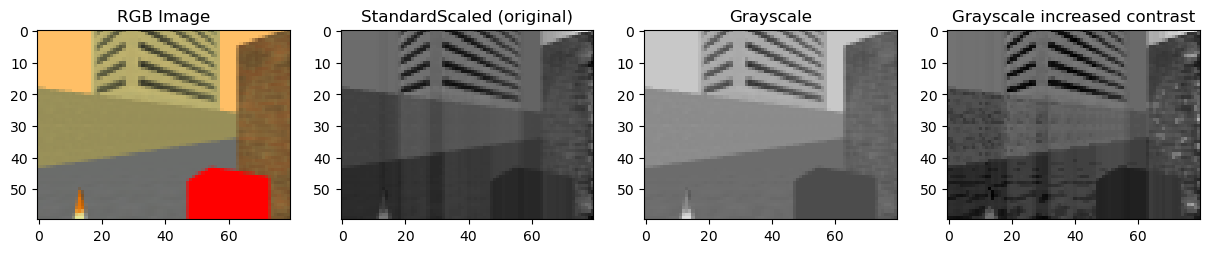

In [147]:
idx = 100

feat = np.reshape(feat_extract_2(processed_obs[idx]), (2, 60, 80))

feat_scaled = np.reshape(feat_extract(processed_obs[idx]), (2, 60, 80))

fig, ax = plt.subplots(1, 4, figsize=(15,5))
ax[0].imshow(processed_obs[idx])
ax[0].set_title('RGB Image')
ax[1].imshow(feat_scaled[1], cmap='gray')
ax[1].set_title('StandardScaled (original)')
ax[2].imshow(np.dot(processed_obs[idx][...,:3], [0.299, 0.587, 0.114]), cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Grayscale')
ax[3].imshow(feat[1], cmap='gray')
ax[3].set_title('Grayscale increased contrast')
plt.show()

In [148]:
processed_obs, processed_acts = generate_dataset(2, 3, 'all')

# Prepare dataset by shuffling and splitting to a test and train set
shuffled_obs, shuffled_actions = shuffle(processed_obs, processed_acts, random_state=0)

features = feat_extract_all_2(shuffled_obs)

X_train, X_test, y_train, y_test = train_test_split(features, shuffled_actions, test_size = 0.20, random_state = 0)

model = Sequential()
model.add(Dense(64, input_dim=9600, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

loss_fn = keras.losses.MeanSquaredError()
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss=loss_fn, metrics=['MeanSquaredError'])

y_train_onehot = keras.utils.to_categorical(y_train, num_classes=3)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=3)

%timeit -r 1 -n 1 model.fit(X_train, y_train_onehot, epochs=20)

model.evaluate(X_test,  y_test_onehot, verbose=2)

predictions = model.predict(X_test)
y_pred_nn = []

for pred in predictions:
    y_pred_nn.append(np.argmax(pred))
    
y_pred_nn = np.array(y_pred_nn)
    
print(classification_report(y_pred_nn, y_test))

def policy_contrast(observation):
    """
    Predicts the odds of every action and puts out the action with the highest odds.
    """
    feat = feat_extract_2(observation)

    action = model.predict(np.reshape(feat,(1,9600)), verbose=0)
    action = np.argmax(action[0])

    return action

Loading 202 demonstrations
Epoch 1/20
230/230 [==============================] - 2s 5ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 2/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 3/20
230/230 [==============================] - 1s 6ms/step - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 4/20
230/230 [==============================] - 2s 7ms/step - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 5/20
230/230 [==============================] - 1s 6ms/step - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 6/20
230/230 [==============================] - 1s 6ms/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 7/20
230/230 [==============================] - 1s 6ms/step - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 8/20
230/230 [==============================] - 1s 6ms/step - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 9/20
230/230 [==============================] - 1s 6ms/step - loss: 0.0341 - mean_squar

In [154]:
if show_policy:
    for i in range(3):
        test_policy(policy_contrast, envs[i], no_runs=5)

### 4.8 Save your model

In [ ]:
model_win.save("best_model")

---

# 5. Present Your Solution (5 points)
1. Summarize your main decisions and insights <span style="float: right;">(2.5 pt)</span>
2. Create a stand-alone demo. I.e., a block of cells that can be run on its own. For that you will need to load your pre-trained best<br> model you saved in the previous section and run it on Time 3.<span style="float: right;">(2.5 pt)</span>


# Summary on decisions and insights

To summarize the main decisions and insights from our analysis and modeling process:

### Decision & Insight 1: Feature Extraction

The two methods of feature extraction that we used were colour image segmentation for the red cube, and grayscale for generalization and to give the model more context. A key insight regarding feature extraction is that certain features were more informative than others in predicting actions and that the options are nearly limitless. Implementing an unsuitable method can have a large impact on the performance of the model. Other potential methods that could have been used for feature extraction include edge detection and texture analysis to recognize spatial patterns in the images.

### Decision & Insight 2: Model Selection

For our model, we chose to use a sequence model of a Recurrent Neural Network with dense layers and applying Dropout to reduce model complexity. At first this seemed like a fitting option, as this was also the model structure that was used in the previous assignment and the large amount of hyperparameters must surely allow for developing a good NN. However we realized after developing the model that Convolutional Neural Networks (CNN) are much better suited for problems involving spatial data such as images. All in all, the RNN still gave a good result for the time ids and was also adequate in generalizing new data even though it may not have been the most optimal model choice.

### Decision & Insight 3: Performance metrics

There are many performance metrics with which to evaluate the model for this assignment the main metrics were F1-score and average reward. F1-Score is a suitable performance metric for this task due to the inherent class imbalance present within the dataset. F1-score favours high precision and recall, which is relevant for this task. However perhaps the most insightful was qualitative analysis by replaying the runs and visually inspecting the NN behaviour in specific scenarios. The visual inspection revealed nuanced behaviour by the NN which can not necessarily be obtained from standard performance metrics. This may not be the most robust manner to evaluate the models' performance, but it gave key insights into what scenarios the AI struggled. Examples are that it would oscillate when facing a wall, or it would mistake a cone as the cube.